# **PyTorch**

## **PyTorch basics**

In [ ]:
conda create --name myenv
conda activate myenv
conda install jupiter
conda install notebook

# https://pytorch.org/get-started/locally/ <- CUDA

conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia

import sys
print(sys.executable)

import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

sudo modprobe nvidia_uvm              #при отказе CUDA

### **Tensors**

In [ ]:
t = torch.empty(3, 5, 2, dtype=torch.int32) #создание тензора из случайных чисел
t = torch.tensor([[1, 2, 3], [4, 5, 6]]) #создание тензора на основе списка
t = torch.tensor(arr, dtype=torch.float32, requires_grad=True) #создание тензора с передачей ранее созданного списка
t = torch.from_numpy(nympy_arr) #создание тензора на основе numpy массива
                                #при изменении массива numpy тензор torch изменяется!

t = torch.tensor([[2, 3], [4, 5]], device=torch.device('cuda:0')) #разместить тензор на GPU
t = t.cpu()     #перевод тензора с GPU на CPU
t = t.to('cpu') #

t = t.cuda()     #перевод тензора с CPU на GPU
t = t.to('cuda') #

t.device #проверить, где лежит тензор: на CPU или GPU

t[0, 0].item() #получить значение из тензора
               #t[0, 0] без item() вернет tensor(228.)
               #t[0, 0].item() вернет 228.0

t = torch.zeros(2, 3, dtype=torch.int32)  #тензор из нулей
t = torch.zeros_like(tensor)  #тензор из нулей той же размерности, что и tensor

t = torch.ones(2, 3, dtype=torch.int32)  #тензор из единиц
t = torch.eye(2, 3, dtype=torch.int32)  #единичная матрица
t = torch.full((2, 4), 5, dtype=torch.int32)  #тензор 2x4, заполненный пятерками
t = torch.full_like(tensor, 88)  #тензор из чисел 88той же размерности, что и tensor

a = torch.arange(7) #диапазон чисел от 0 до 6
a = torch.arange(5, 50, 10) #числа от 5 до 50 с шагом 10
a = torch.linspace(1, 10, 100) #100 точек между 1 и 10

t = torch.diag(torch.tensor([5, 4, 3])) #создает диагональную матрицу 3х3 из переданных элементов
t = torch.tril(torch.tensor([[5, 4, 3], [1, 2, 2], [1, 2, 2]])) #нижнетреугольная матрица из переданной
t = torch.triu(torch.tensor([[5, 4, 3], [1, 2, 2], [1, 2, 2]])) #верхнетреугольная матрица из переданной

torch.cat([t1, t2], dim=1) #объединение тензоров по оси

r = torch.rand(2, 3) #тензор, заполненный случайными значениями из (0, 1)
r = torch.randn(2, 3) #тензор из нормального распределения чисел со средним 0 и ст. отклонением 1

torch.manual_seed(54) #воспроизводимость случайных чисел

d = t.reshape(27)      #
d = t.reshape(3, 9)    #изменение размерности тензора
d = t.reshape(3, 3, 3) #

c = torch.matmul(a, b) #матричное умножение С транслированием
d = torch.mm(a, b) #матричное умножение БЕЗ транслирования
e = torch.bmm(a, b) #матричное умножение для батчей 
d = torch.dot(a, b) #скалярное произведение
e = torch.outer(a, b) #внешнее произведение
r = torch.mv(a, b) #умножение матрицы на вектор
rank = torch.linalg.matrix_rank(a) #вычисление ранга матрицы
s = torch.linalg.solve(A, y) #вычисление решения уравнения Ax=y

d = t.view(27)      #
d = t.view(3, 9)    #изменение размерности тензора
d = t.view(3, 3, 3) #

r = t.resize_(2, 2) #выбрать часть тензора

v = t.ravel() #вытянуть тензор в вектор

t.permute(1, 0) #поменять оси 1 и 0 местами (транспонирование)
t.mT            #аналогично

torch.unsqeeze(t, dim=0) #добавление одноэлементной оси на первое место
t.unsqeeze(0)            #
t.unsqeeze(-1) #добавление одноэлементной оси на последнее место

torch.unsqeeze(t) #удаление одноэлементных осей
t.squeeze()       #
t.squeeze(dim=3)  #если третья ось одноэлементна, то она удалится

torch.unsqeeze(x, ) #добавление оси

m = t.sum(dim=0)
m = t.max(dim=0) #возвращает два списка: индексы и значения
m = t.max(dim=0).values
m = t.max(dim=1).indices
m = t.amax(dom=0) #сразу возвращает значения
m = t.amin(dom=0) #

m = torch.abs(t)   #
m = torch.round(t) #или через inplace методы
m = torch.log(t)   #

torch.sin(x)
torch.cos(x)
torch.tan(x)

torch.median(x)    #
torch.var(x)       #
torch.std(x)       #статистика
torch.corrcoef(x)  #
torch.cov(x)       #

m = t.mean(dim=1, keepdim=True) #вычисляем среднее по строкам, 
                                #keepdim оставляет ту ось, по которой было усреднение

tensor_half = tensor.half()      #torch.float16     #
tensor_float = tensor.float()    #torch.float32     #
tensor_double = tensor.double()  #torch.float64     #
tensor_short = tensor.short()    #torch.int16       #преобразование типов
tensor_int = tensor.int()        #torch.int32       #
tensor_long = tensor.long()      #torch.int64       #
tensor_char = tensor.char()      #torch.int8        #
tensor_byte = tensor.byte()      #torch.uint8       #
tensor_bool = tensor.bool()      #torch.bool        #

### **Model**

**In-place (mutable)** методы изменяют текущий тензор.

In [ ]:
t.add_(5)
t.mul_(2)
t.zero_()
t.fill_(-0.8)
t.random_(1, 7) 
t.uniform_(0, 1)
t.normal_(0, 1)

**Immutable методы:** Эти методы не изменяют текущий тензор, а создают новый.

In [ ]:
t.add(5)
t.mul(2)
t.zero()
t.fill(-0.8)
t.random(1, 7) 
t.uniform(0, 1)
t.normal(0, 1)

## **Activation functions**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

### **Функции активации для скрытых слоев**

**Сигмоида**:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$

**Гиперболический тангенс**:
   $$
   \sigma(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}
   $$
   
**ReLU (Rectified Linear Unit)**:
   $$
   \sigma(z) = \max(0, z)
   $$
Недостатком **сигмоиды** и **гиперболического тангенса** является наличие практически пологих областей. Если на каком-то нейроне сумма оказывается в пределах этих областей, то производная этих функций активации будет практически равна нулю, значит, веса связей практически не будут изменяться. Такие области называют **областями насыщения**

**ReLU** же не имеет пологих участков в положительной области, производная там всегда равна единице, значит градиент всегда будет значимым.

### **Функции активации для выходных слоев**

**Линейная функция активации**:
   $$
   \sigma(z) = z
   $$
   
**Сигмоида**:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
   
**Softmax**:
   $$
   \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^{M} \exp(z_j)}, \quad i = 1, 2, \ldots, M
   $$



## **Loss functions**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

1. **Среднеквадратичная ошибка (nn.MSELoss)**:
   $$
   L = \frac{1}{l} \sum_{i=1}^{l} \left(y_{i} - \hat{y}_{i}\right)^{2}
   $$
2. **Абсолютная ошибка (nn.L1Loss)**:
   $$
   L = \frac{1}{l} \sum_{i=1}^{l} \left|y_{i} - \hat{y}_{i}\right|
   $$
3. **Бинарная кросс-энтропия (nn.BCELoss)**:
   $$
   L = -\frac{1}{l} \sum_{i=1}^{l} \left[y_{i} \log \hat{y}_{i} + \left(1 - y_{i}\right) \log \left(1 - \hat{y}_{i}\right)\right]
   $$
4. **Бинарная кросс-энтропия с логитами (nn.BCEWithLogitsLoss)**:
    $$
    L = -\frac{1}{l} \sum_{i=1}^{l} \left[y_{i} \log \sigma(\hat{y}_{i}) + \left(1 - y_{i}\right) \log \left(1 - \sigma(\hat{y}_{i})\right)\right]
    $$
6. **Кросс-энтропия (nn.CrossEntropyLoss)**:
   $$
   L = -\frac{1}{l} \sum_{m \in N} \sum_{i=1}^{n} y_{i}^{(m)} \log y_{i}^{(m)}
   $$
7. **Отрицательная логарифмическая вероятность (nn.NLLLoss)**:
   $$
   L = -\sum_{i=1}^{l} y_{i} \log \hat{y}_{i}
   $$

## **Optimization**

In [ ]:
from torch import optim

### **Momentum**

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

- **Идея**: Метод оптимизации, вдохновленный инерцией. Он добавляет "память" о предыдущих градиентах, чтобы ускорить обучение.
- **Принцип**: Обновление параметров учитывает не только текущий градиент, но и накопленное движение (скорость).
- **Формула**:
  $$
  v_t = \beta v_{t-1} + (1 - \beta) g_t
  $$
  $$
  \theta_{t} = \theta_{t-1} - \eta \cdot v_{t}
  $$
  где:
  - $v_t$ — скорость (направление и величина изменений),
  - $g_t$ — текущий градиент,
  - $\beta$ — коэффициент моментума,
  - $\eta$ — скорость обучения.

### **Nesterov Accelerated Gradient**

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)

- **Идея**: Метод оптимизации, вдохновленный инерцией. Он добавляет предвосхищение изменений на основе накопленного движения, чтобы ускорить обучение и повысить стабильность.

- **Принцип**: Обновление параметров учитывает не только текущий градиент, но и предсказанное будущее положение, что позволяет заранее корректировать траекторию обновлений.

- **Формула**:

  1. Предсказание будущего положения:  
     $$ \theta_{\text{предв}} = \theta_t - \beta v_{t-1} $$

  2. Обновление скорости:  
     $$ v_t = \beta v_{t-1} + (1 - \beta)g_{\theta_{\text{предв}}}$$

  3. Обновление параметров:  
     $$ \theta_{t} = \theta_{t-1} - \eta v_t $$

  где:
  - $v_t$ — скорость, накопленное движение,
  - $g_{\theta_{\text{предв}}}$ — градиент, вычисленный в предсказанном положении,
  - $\beta$ — коэффициент моментума,
  - $\eta$ — скорость обучения.


### **RMSprop (Root Mean Square Propagation)**

In [ ]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.01, alpha=0.99)

- **Идея**: Адаптирует скорость обучения для каждого параметра, используя скользящее среднее квадратов градиентов. Это помогает стабилизировать обновления.
- **Принцип**: Для каждого параметра накапливается среднеквадратичное значение градиентов, что позволяет учитывать только последние градиенты.
- **Формула**:
  $$
  v_t = \beta v_{t-1} + (1 - \beta) g_t^2
  $$
  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{v_t + \epsilon}} \cdot g_t
  $$
  где:
  - $v_t$ — скользящее среднее квадратов градиентов,
  - $\beta$ — коэффициент для скользящего среднего,
  - $\eta$ — скорость обучения,
  - $\epsilon$ — маленькое число для стабилизации.

### **Adam (Adaptive Moment Estimation)**

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))

- **Идея**: Сочетает **Momentum** и **RMSprop**. Использует как первый момент (градиенты), так и второй момент (квадраты градиентов) для адаптации скорости обучения.
- **Принцип**: Адаптирует скорость обучения для каждого параметра, используя скользящее среднее градиентов и квадратов градиентов.
- **Формула**:
  $$
  v_t = \beta_1 v_{t-1} + (1 - \beta_1) g_t
  $$
  $$
  s_t = \beta_2 s_{t-1} + (1 - \beta_2) g_t^2
  $$
  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{s_t + \epsilon}} \cdot v_t
  $$
  где:
  - $v_t$ и $s_t$ — моменты первого и второго порядка,
  - $\beta_1$, $\beta_2$ — коэффициенты для моментов,
  - $\eta$ — скорость обучения,
  - $\epsilon$ — стабилизирующий коэффициент.

### **Adagrad (Adaptive Gradient Algorithm)**

In [ ]:
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)

- **Идея**: Адаптивный метод оптимизации, который изменяет скорость обучения для каждого параметра в зависимости от величины его градиента.
- **Принцип**: Накапливается сумма квадратов градиентов для каждого параметра, и это накопление влияет на скорость обучения.
- **Формула**:
  $$
  \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot g_t
  $$
  где:
  - $G_t$ — накопленная сумма квадратов градиентов,
  - $\epsilon$ — маленькое число для стабилизации.

### **Sheduler**

In [ ]:
lr_lambda = lambda i: 0.8 * 0.85 ** i
lr_scheduler = torch.optim.lr_scheduler.LambdaLR(opt, lr_lambda=lr_lambda)

#На каждой эпохе текущий learning rate будет умножаться на значение, вычисленное функцией lr_lambda

In [ ]:
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(opt, milestones=[10, 20, 30], gamma=0.1)

#milestones=[10, 20, 30]: эпохи, на которых learning rate будет умножен на gamma

In [ ]:
lr_scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=30, gamma=0.1)

#step_size=30: количество эпох между умножением текущего learning rate на gamma

In [ ]:
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(opt, gamma=0.9)

#gamma=0.9: коэффициент, на который будет умножаться learning rate на каждой эпохе

In [ ]:
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, 
                                                        mode='min',
                                                        factor=0.1,
                                                        patience=10,
                                                        threshold=0.0001,
                                                        threshold_mode='rel',
                                                        cooldown=0,
                                                        min_lr=0,
                                                        eps=1e-8)

#mode: При 'min' learning rate уменьшается, если отслеживаемая метрика не снижается
#      При 'max' learning rate уменьшается, если метрика не увеличивается

#factor: Коэффициент уменьшения learning rate

#patience: Количество эпох ожидания без улучшений метрики до уменьшения learning rate

#threshold: Минимальное изменение метрики, которое считается улучшением

#threshold_mode: При 'rel' учитывается относительное изменение
#                При 'abs' учитывается абсолютное изменение

#cooldown: Число эпох отдыха после уменьшения learning rate, 
#          в течение которых снижение learning rate временно не применяется

#min_lr: Минимально допустимое значение learning rate

#eps: Минимальная разница между текущим и новым learning rate
#     Если разница меньше этого значения, изменение learning rate не применяется

**Общая схема использования:**

In [ ]:
lr_scheduler = torch.optim.lr_scheduler.SomeScheduler()

lr_list = []

for epoch in range(100):

    #Train
    for _ in range(1):
        #forward pass
        #backward pass

        opt.step()

    #Validation

    lr_scheduler.step()
    lr = lr_scheduler.get_last_lr() #lr_sheduler._last_lr[0] для lr_scheduler.ReduceLROnPlateau
    lr_list.append(lr)

## **Backpropagation**

**Backpropagation** является основным методом обучения для большинства современных нейронных сетей и позволяет эффективно оптимизировать их параметры, что делает его ключевым элементом в области машинного обучения и глубокого обучения.

### **Интуиция**

1. **Прямой проход:** входные данные $ x $ пропускаются через нейросеть, формируя на каждом слое сети некоторую взвешенную сумму, которая потом пропускается через функцию активации $ \sigma(x) $. Выход функции активации потом является входным значением для последующих слоев сети. В конце мы получаем выходное значение и подсчитываем $ Loss $.

2. **Обратный проход:** для обновления весов сети мы должны вычислить производную функции потерь по весам, т.е.$ \frac{\partial \text{Loss}}{\partial w} $. Это делается по цепному правилу: направляясь от функции ошибки в сторону весов, то есть в обратном направлении, мы последовательно вычисляем частные производные от $ Loss $ по каждому встречающемуся узлу сети. Добравшись таким образом до входа сети, мы получаем градиент для весов, который потом используем для их обновления

$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial L} \cdot \frac{\partial L}{\partial \sigma} \cdot \frac{\partial \sigma}{\partial \text{sum}} \cdot \frac{\partial \text{sum}}{\partial w}
$$

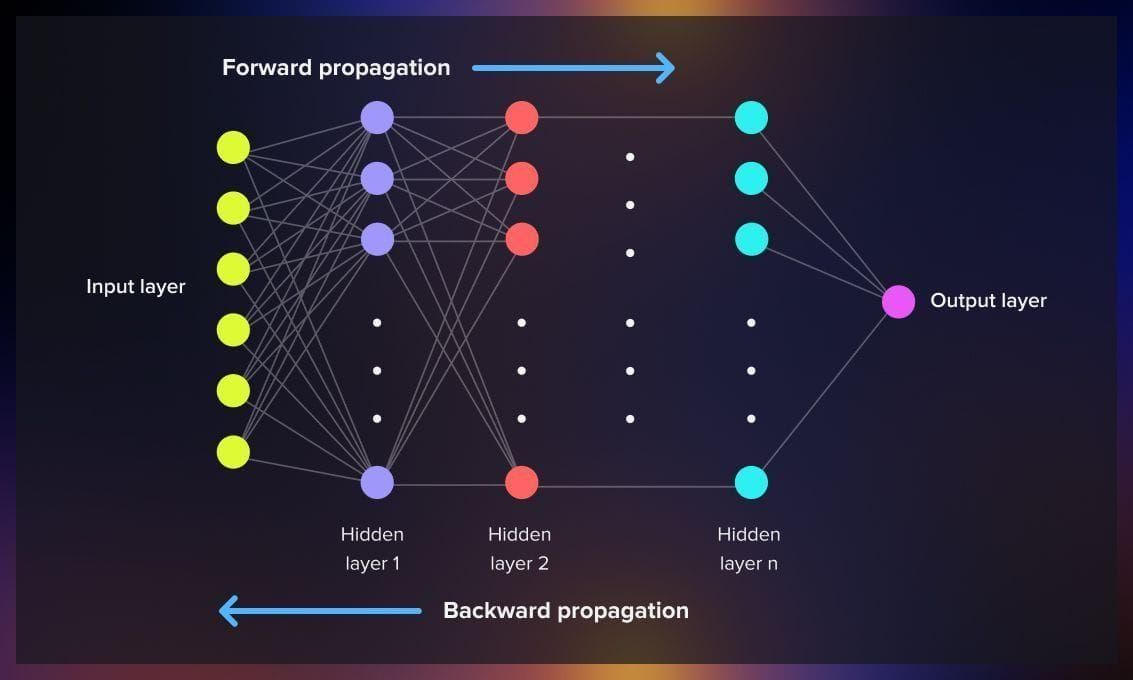

## **nn.Linear, nn.Module, nn.Sequential, nn.ModuleList, nn.ModuleDict**

### **nn.Linear**

**n.Linear** — это линейный слой в нейронной сети.

In [ ]:
import torch
import torch.nn as nn

linear_layer = nn.Linear(in_features=3, out_features=2, bias=True)
input_data = torch.tensor([[1.0, 2.0, 3.0]])
output_data = linear_layer(input_data)

### **nn.Module**

**nn.Module** — это базовый класс для всех нейронных сетей в PyTorch. Все кастомные архитектуры наследуются от этого класса.

In [ ]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()                          
        self.layer2 = nn.Linear(hidden_size, output_size) 

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

model = MyModel(input_size=10, hidden_size=20, output_size=1)

### **nn.Sequential**

Позволяет удобно создавать нейронные сети, состоящие из последовательности слоев.

In [ ]:
import torch
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(10, 20),    
    nn.ReLU(),      
    nn.Linear(20, 1) 
)

### **nn.ModuleList**

Контейнер, который позволяет хранить и управлять списком слоев, которые являются экземплярами nn.Module. Дает больше гибкости, позволяя вам добавлять слои в список и затем управлять их применением в своем коде.

In [ ]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.layers = nn.ModuleList([
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        ])
        
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

model = MyModel()

### **nn.ModuleDict**

Контейнер, аналогичный nn.ModuleList, но предназначенный для хранения слоев или модулей в виде словаря

In [ ]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.layers = nn.ModuleDict({
            'layer1': nn.Linear(10, 20), 
            'relu': nn.ReLU(),            
            'layer2': nn.Linear(20, 1)    
        })
        
    def forward(self, x):
        x = self.layers['layer1'](x)
        x = self.layers['relu'](x)
        x = self.layers['layer2'](x)
        return x

model = MyModel()

## **Dataset и Dataloader, ImageFolder**

Если структура данных имеет вид:

root/
    class_a/
        img1.png
        img2.png
        ...
    class_b/
        img1.png
        img2.png
        ...
    ...

То имеет смысл использовать ImageFolder, автоматически создающий датасет без определения собственного класса.

In [ ]:
from torchvision.datasets import ImageFolder

train_data = ImageFolder('/home/aeternnar/Documents/ml/mnist/training', transform=transform)
test_data = ImageFolder('/home/aeternnar/Documents/ml/mnist/testing', transform=transform)

### **Классификация**

In [ ]:
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class DatasetCls(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        self.len_dataset = 0
        self.data_list = []
        
        for path_dir, dir_list, file_list in os.walk(path):
            if path_dir == path:
                self.classes = sorted(dir_list)
                self.class_to_idx = {
                    cls_name: i for i, cls_name in enumerate(self.classes)
                }
                continue
            cls = path_dir.split('/')[-1]
            
            for name_file in file_list:
                file_path = os.path.join(path_dir, name_file)
                self.data_list.append((file_path, self.class_to_idx[cls]))
            self.len_dataset += len(file_list)
        
    def __len__(self):
        return self.len_dataset
            
    def __getitem__(self, index):
        file_path, target = self.data_list[index]
        sample = np.array(Image.open(file_path))
        if self.transform is not None:
            sample = self.transform(sample)
        return sample, target

train_data = DatasetCls('/content/mnist/training')
test_data = DatasetCls('/content/mnist/testing')

train_data, val_data = random_split(train_data, [0.8, 0.2])

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

### **Регрессия**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import os
import json
from PIL import Image

class DatasetReg(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        
        self.list_name_file = os.listdir(path)
        if 'coords.json' in self.list_name_file:
            self.list_name_file.remove('coords.json')
            
        self.len_dataset = len(self.list_name_file)
        with open(os.path.join(self.path, 'coords.json'), 'r') as f:
            self.dict_coords = json.load(f)
            
    def __len__(self):
        return self.len_dataset
        
    def __getitem__(self, index):
        name_file = self.list_name_file[index]
        path_img = os.path.join(self.path, name_file)
        
        img = np.array(Image.open(path_img))
        coord = np.array(self.dict_coords[name_file])
        
        if self.transform is not None:
            img = self.transform(img)
            
        return img, coord

dataset = DatasetReg('/content/dataset')

train_data, val_data, test_data = random_split(dataset, [0.7, 0.1, 0.2])

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(val_data, batch_size=16, shuffle=False)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

## **Dataset Transform** 

In [13]:
from torchvision.transforms import v2

#### **v2.Grayscale()**
Преобразует цветные изображения в градацию серого

In [ ]:
transform = v2.Grayscale()
image = transform(tensor)

#### **v2.ToImage()**
Преобразует данные в формат изображения

In [ ]:
transform = v2.ToImage()
image = transform(tensor)

#### **v2.Lambda()**
Примененяет произвольную функцию к изображению или тензору

In [ ]:
transform = v2.Lambda(lambda x: x * 2)
image = transform(tensor)

#### **v2.ToDtype()**
Преобразует данные в указанный тип

In [ ]:
transform = v2.ToDtype(torch.uint8, scale=True)
image = transform(tensor)

#### **v2.RandomResizedCrop()**
выполняет обрезку изображения случайного размера и случайной пропорции, а затем изменяет размер обрезанного изображения до заданного.

In [ ]:
transform = RandomResizedCrop(size=(128, 128), scale=(0.5, 1.0), ratio=(0.75, 1.33))
image = transform(image)

#### **v2.Normalize()**
Используется для нормализации изображения (или тензора), то есть для приведения значений пикселей изображения к определённому диапазону с использованием заданных среднего значения (mean) и стандартного отклонения (std).

In [ ]:
transform = v2.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
image = transform(image)

#### **v2.Compose()**
Compose принимает список трансформаций и применяет их по очереди, начиная с первой и заканчивая последней.

In [ ]:
transform = Compose([
    ToImage(),  # Преобразует в изображение, если нужно
    ToDtype(torch.uint8, scale=True),  # Переводим в uint8 для ускорения вычислений
    RandomResizedCrop(size=(224, 224), antialias=True),  # Обрезка и изменение размера
    ToDtype(torch.float32, scale=True),  # Преобразуем в float32
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Нормализуем
])

# Применяем трансформации
transformed_image = transform(image)

## **Learning cycle**

In [ ]:
# Цикл обучения

# Тренировка модели
    # Данные
    # Прямой проход + расчёт ошибки модели
    # Обратный проход
    # Шаг оптимизации

# Расчёт значения метрики
# Сохранение значения функции потерь и метрики

# Проверка модели (валидация)
    # Данные
    # Прямой проход + расчёт ошибки модели

# Расчёт значения метрики
# Сохранение значения функции потерь и метрики

### **Подготовка**

In [ ]:
model = MyModel(784, 10).to(device) #перевод модели на девайс

inp = torch.rand([16, 784], dtype=torch.float32).to(device) #проверяем правильность построения модели.
out = model(input)
print(out.shape) #должны получить ожидаемый выход

loss_model = nn.CrossEntropyLoss() #выбор лосса
opt = torch.optim.Adam(model.parameters(), lr=0.001) #выбор оптимизатора

### **Обучение**

In [ ]:
import time
start_time = time.time()

EPOCHS = 20

train_loss = []
val_loss = []
train_acc = []
val_acc = []
lr_list = []
best_loss = None
count = 0

for epoch in range(EPOCHS):
    
    model_clf.train()
    running_train_loss = []
    true_answer = 0
    train_loop = tqdm(train_loader1, leave=False)
    
    for x, targets in train_loop:
        x = x.reshape(-1, 28*28).to(device)
        targets = targets.reshape(-1).to(torch.int32)
        targets = torch.eye(10)[targets].to(device)

        pred = model_clf(x)
        loss = loss_clf(pred, targets)

        optim_clf.zero_grad()
        loss.backward()

        optim_clf.step()
        running_train_loss.append(loss.item())
        mean_train_loss = sum(running_train_loss)/len(running_train_loss)

        true_answer += (pred.argmax(dim=1) == targets.argmax(dim=1)).sum().item()
        
        train_loop.set_description(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}")

    running_train_acc = true_answer / len(train_data)
    train_loss.append(mean_train_loss)
    train_acc.append(running_train_acc)
    
    model_clf.eval()
    with torch.no_grad():
        running_val_loss = []
        true_answer = 0
        for x, targets in val_loader1:
            x = x.reshape(-1, 28*28).to(device)
            targets = targets.reshape(-1).to(torch.int32)
            targets = torch.eye(10)[targets].to(device)
    
            pred = model_clf(x)
            loss = loss_clf(pred, targets)
            
            running_val_loss.append(loss.item())
            mean_val_loss = sum(running_val_loss)/len(running_val_loss)

            true_answer += (pred.argmax(dim=1) == targets.argmax(dim=1)).sum().item()
            
        running_val_acc = true_answer / len(val_data)
        val_loss.append(mean_val_loss)
        val_acc.append(running_val_acc)

    lr_sheduler.step(mean_val_loss)
    lr = lr_sheduler._last_lr[0]
    lr_list.append(lr)
    
    print(f"Epoch [{epoch+1}/{EPOCHS}], train_loss={mean_train_loss:.4f}, train_acc={running_train_acc:.4f}, val_loss={mean_val_loss:.4f}, val_acc={running_val_acc:.4f}, lr={lr:.4f}")

    if best_loss is None:
        best_loss = mean_val_loss
        
    if mean_val_loss < best_loss:
        best_loss = mean_val_loss
        count = 0

        torch.save(model_clf.state_dict(), f'model_state_dict_epoch_{epoch+1}.pt')
        print(f'На эпохе {epoch+1}, сохранена модель со значением функции потерь на валидации: {mean_val_loss:.4f}', end='\n\n')

    if count >= 10:
        print(f'\033[31mОбучение остановлено на {epoch+1} эпохе.\033[0m]')
        break
        count += 1
end_time = time.time()

print(end_time - start_time)

In [ ]:
#оцениваем процесс изменения лосса и метрики

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['loss_train', 'loss_val']);

plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy_train', 'accuracy_val']);

### **Тестирование**

In [ ]:
model_clf.eval()
with torch.no_grad():
    running_test_loss = []
    true_answer = 0
    for x, targets in test_loader1:
        x = x.reshape(-1, 28*28).to(device)
        targets = targets.reshape(-1).to(torch.int32)
        targets = torch.eye(10)[targets].to(device)
    
        pred = model_clf(x)
        loss = loss_clf(pred, targets)
            
        running_test_loss.append(loss.item())
        mean_test_loss = sum(running_test_loss)/len(running_test_loss)

        true_answer += (pred.argmax(dim=1) == targets.argmax(dim=1)).sum().item()
            
    running_test_acc = true_answer / len(val_data)

print(f"test_loss={mean_test_loss:.4f}, test_acc={running_test_acc:.4f}")

## **torch.save() and torch.load()**

In [ ]:
torch.save(model.state_dict(), "model_weights.pth", weights_only=True) #сохранение коэффициентов модели
torch.save(model, "full_model.pth") #сохранение модели

torch.load("full_model.pth") #загрузка модели

weights = torch.load("model_weights.pth", map_location=device)  #загрузка сохранённых коэффициентов 
model.load_state_dict(weights)  # Загрузка параметров в модель

## **Dropout, Batch Normalization**

**Batch Normalization** обычно применяется непосредственно после слоя с нейронами и до функции активации. Батч-нормализация корректирует значения активаций слоя, чтобы их распределение было более стабильным.

In [ ]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 256, bias=False) #обычно перед батч-нормализацией отключают bias
        self.bn1 = nn.BatchNorm1d(256)  # Батч-нормализация после линейного слоя
        self.layer_2 = nn.Linear(256, output)
        self.dropout = nn.Dropout(0.5)
        self.act = nn.ReLU()

    def forward(self, x):
        x = self.layer_1(x) 
        x = self.bn1(x)      
        x = self.act(x)      
        x = self.dropout(x)  
        x = self.layer_2(x)  
        return x

## **CNN**

На вход сверточному слою поступают тензоры в формате (batch_size, C, H, W)

Сам сверточный слой создается следующим образом:

In [ ]:
nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=bias)

Значение параметров: 
* **in_channels**: число каналов во входном тензоре, совпадает с числом ядер внутри каждого сверточного фильтра.
* **out_channels**: число каналов в выходном тензоре, совпадает числом фильтров.
* **kernel_size**: кортеж, размер ядра.
* **stride**: кортеж, шаг фильтра.
* **padding**: кортеж, дополнение незначущими нулями.
* **bias**: отключение/включение смещения.

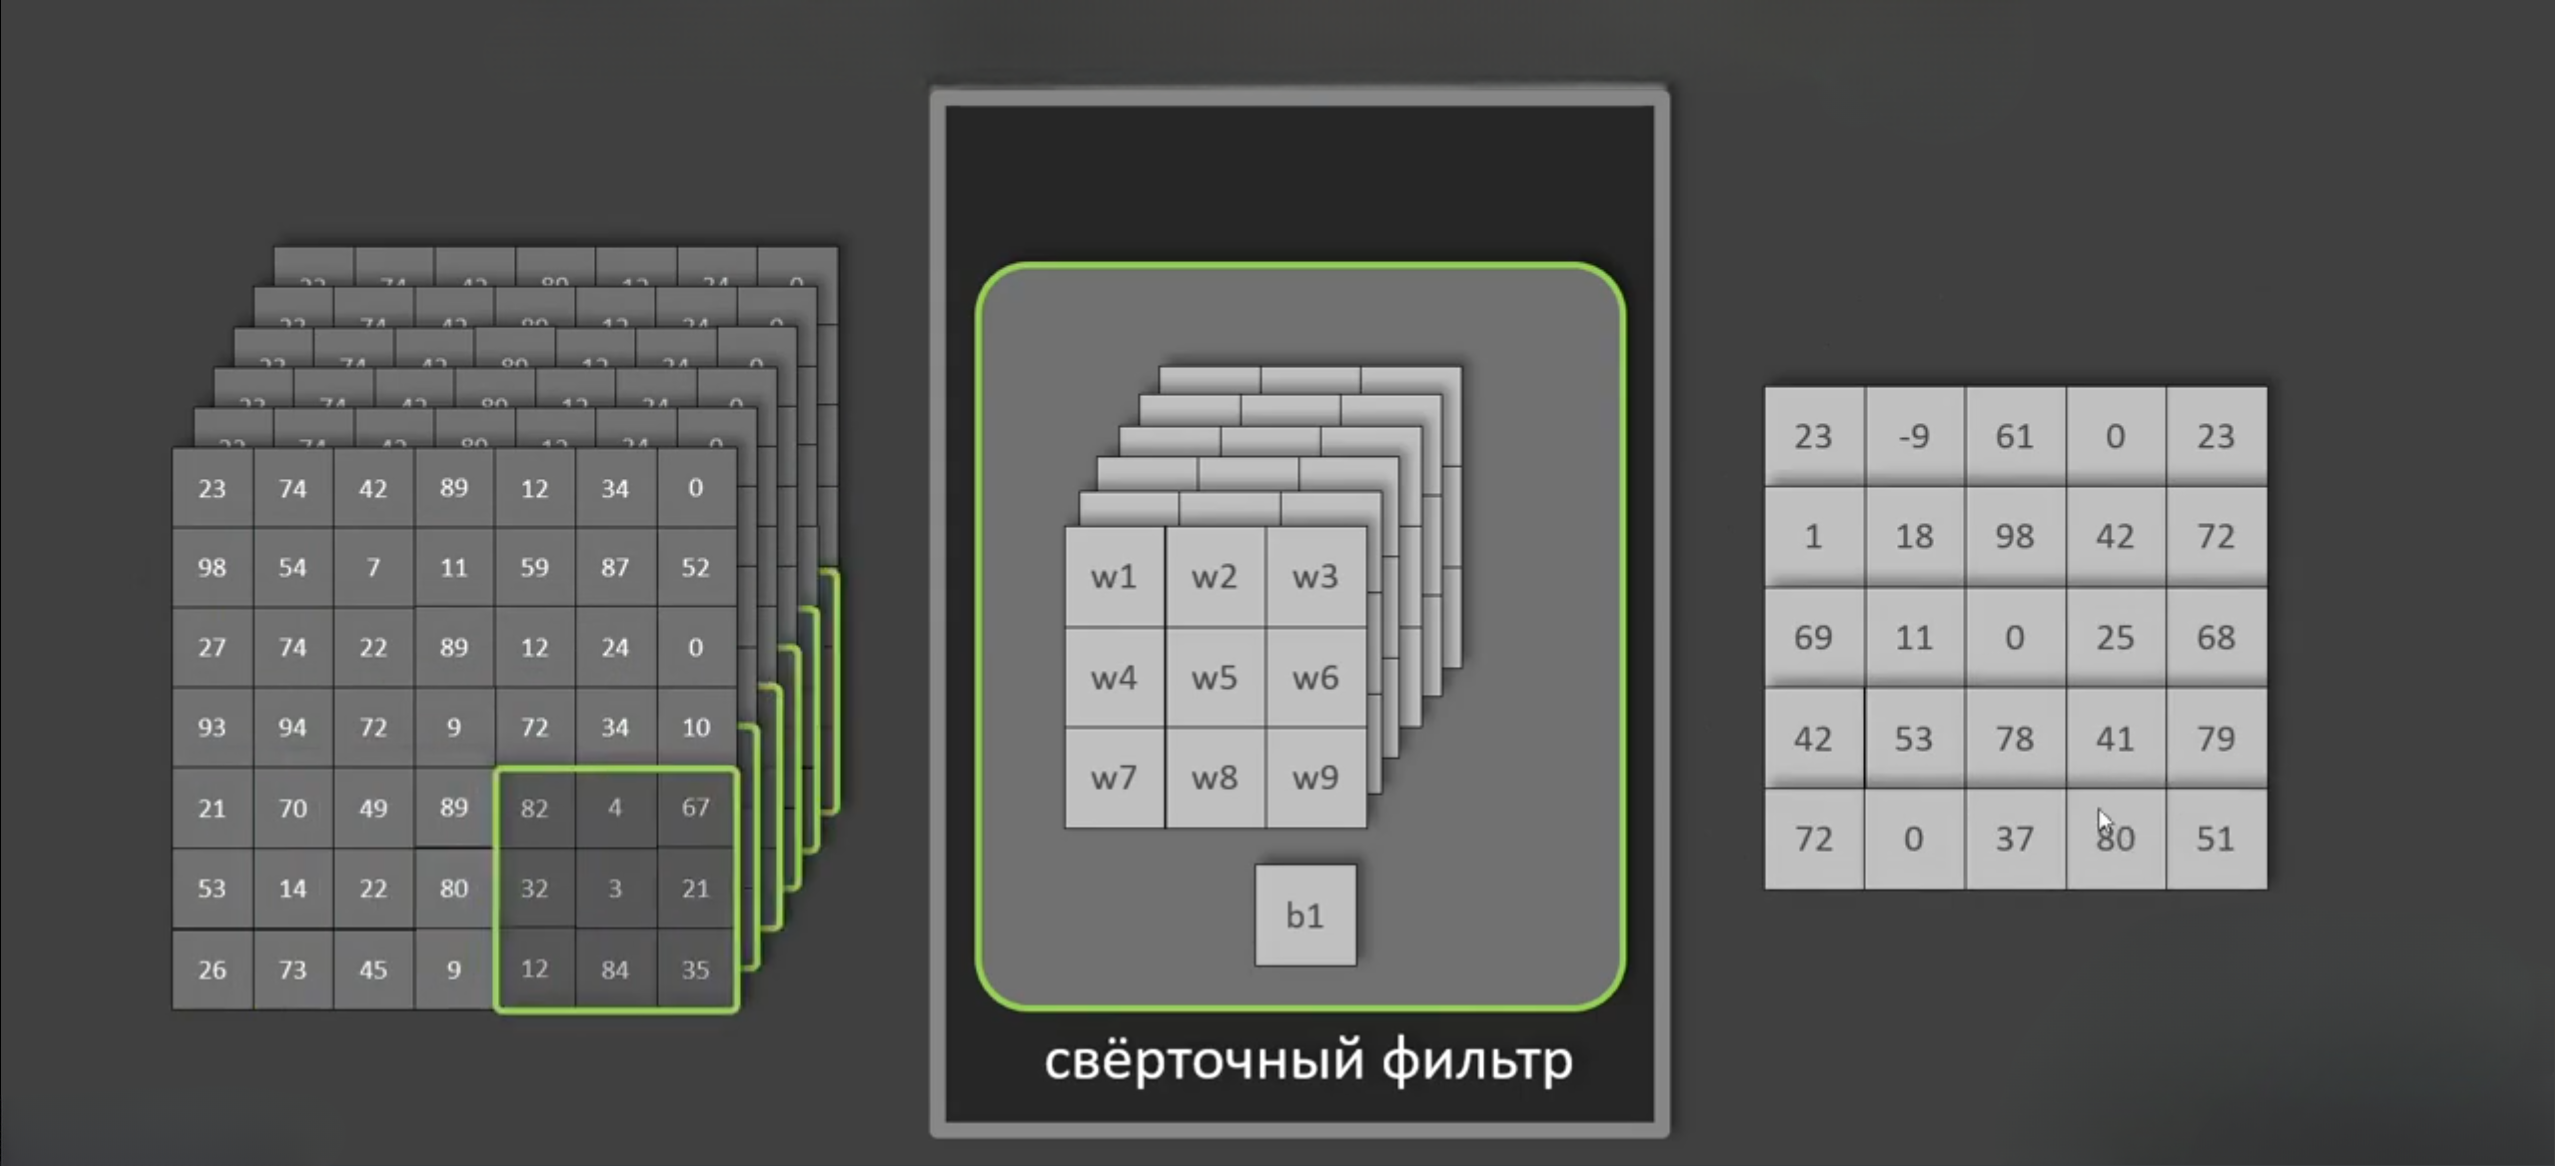

Высоту и ширину выходного тензора конкретного сверточного слоя можно высчитать по следующей формуле:

$$
\text{Output Size} = \left\lfloor \frac{\text{Input Size} - \text{Kernel Size} + 2 \times \text{Padding} }{\text{Stride}} \right\rfloor + 1
$$